# Производная $\frac{1}{x}$ — ПРОСТОЕ объяснение

## 🎯 Главная идея (за 30 секунд):

**Вопрос:** Чему равна производная $\frac{d}{dx}\left(\frac{1}{x}\right)$?

**Ответ:** $-\frac{1}{x^2}$

**Почему минус?** Потому что функция $\frac{1}{x}$ **УМЕНЬШАЕТСЯ** когда $x$ растёт:
- При $x = 1$: $\frac{1}{x} = 1$
- При $x = 2$: $\frac{1}{x} = 0.5$ ← стало меньше!
- При $x = 3$: $\frac{1}{x} = 0.33$ ← ещё меньше!

Функция падает → производная отрицательная → минус в формуле!

---

## 📝 План объяснения:

1. **Простая арифметика** — считаем на примере
2. **Алгебраическая формула** — общий случай
3. **Почему минус** — геометрия

Поехали! ⬇️


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Настройка для красивых графиков
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Символы
x, dx = sp.symbols('x dx', real=True, positive=True)


## Визуализация: что происходит при nudging?


ПРИМЕР: x = 2, маленький шаг dx = 0.001

📍 Старое значение:
   f(x) = 1/2 = 0.5

📍 Новое значение (после шага dx = 0.001):
   f(x+dx) = 1/2.001 = 0.499750

📍 Изменение функции:
   Δf = f(x+dx) - f(x)
      = 0.499750 - 0.5
      = -0.000250

   ⚠️  ОТРИЦАТЕЛЬНОЕ! Функция УМЕНЬШИЛАСЬ!

📍 Производная (приближённо):
   f'(x) ≈ Δf/dx = -0.000250 / 0.001
        ≈ -0.249875

📍 Производная (точная формула):
   f'(x) = -1/x² = -1/2² = -1/4 = -0.25

   Разница: 0.000124938 (очень мало!)

ВЫВОД:

✓ Когда x увеличивается → f(x) УМЕНЬШАЕТСЯ
✓ Значит производная ОТРИЦАТЕЛЬНАЯ
✓ Для x=2: производная = -0.25



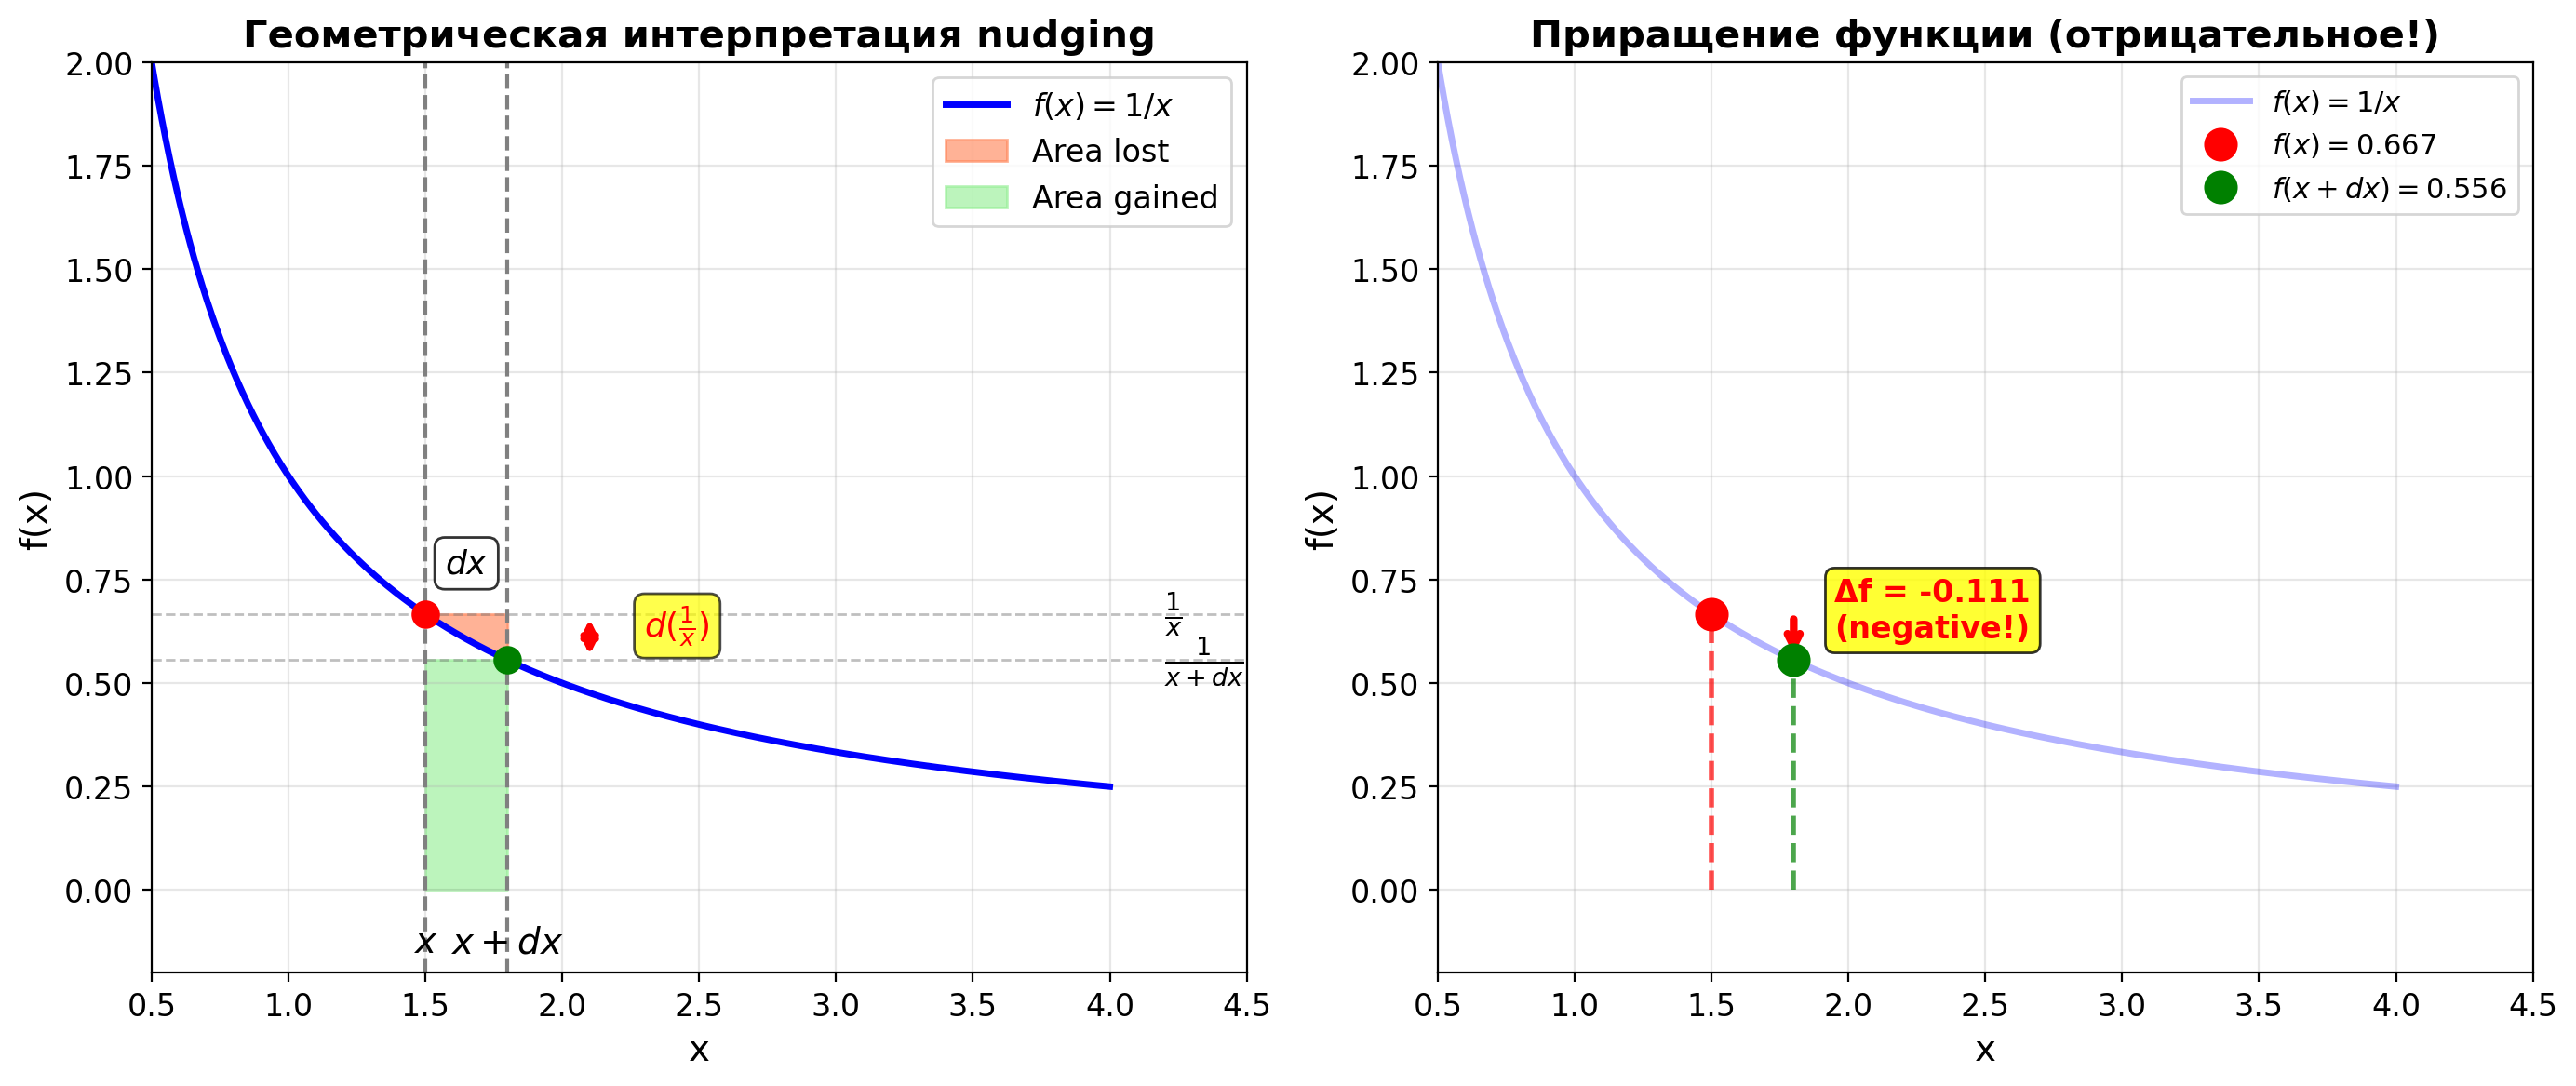

НАБЛЮДЕНИЕ:
При x = 1.5, f(x) = 0.6667
При x = 1.8, f(x+dx) = 0.5556

Δf = f(x+dx) - f(x) = 0.5556 - 0.6667 = -0.1111

✓ Функция УБЫВАЕТ → Δf < 0 → производная отрицательна!


In [13]:
print("="*80)
print("ПРИМЕР: x = 2, маленький шаг dx = 0.001")
print("="*80)
print()

x_test = 2
dx_test = 0.001

# Исходное значение
f_old = 1 / x_test
print(f"📍 Старое значение:")
print(f"   f(x) = 1/{x_test} = {f_old}")
print()

# Новое значение
x_new = x_test + dx_test
f_new = 1 / x_new
print(f"📍 Новое значение (после шага dx = {dx_test}):")
print(f"   f(x+dx) = 1/{x_new} = {f_new:.6f}")
print()

# Изменение
delta_f = f_new - f_old
print(f"📍 Изменение функции:")
print(f"   Δf = f(x+dx) - f(x)")
print(f"      = {f_new:.6f} - {f_old}")
print(f"      = {delta_f:.6f}")
print()
print(f"   ⚠️  ОТРИЦАТЕЛЬНОЕ! Функция УМЕНЬШИЛАСЬ!")
print()

# Производная
derivative_approx = delta_f / dx_test
print(f"📍 Производная (приближённо):")
print(f"   f'(x) ≈ Δf/dx = {delta_f:.6f} / {dx_test}")
print(f"        ≈ {derivative_approx:.6f}")
print()

# Точное значение
derivative_exact = -1 / (x_test**2)
print(f"📍 Производная (точная формула):")
print(f"   f'(x) = -1/x² = -1/{x_test}² = -1/{x_test**2} = {derivative_exact}")
print()

error = abs(derivative_approx - derivative_exact)
print(f"   Разница: {error:.9f} (очень мало!)")
print()

print("="*80)
print("ВЫВОД:")
print("="*80)
print()
print("✓ Когда x увеличивается → f(x) УМЕНЬШАЕТСЯ")
print("✓ Значит производная ОТРИЦАТЕЛЬНАЯ")
print(f"✓ Для x={x_test}: производная = {derivative_exact}")
print()
print("="*80)

# Простой график
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Выберем конкретные значения для визуализации
x_val = 1.5
dx_val = 0.3

# График функции
x_range = np.linspace(0.3, 4, 1000)
y_range = 1 / x_range

# Левый график: геометрическая интерпретация
ax1.plot(x_range, y_range, 'b-', linewidth=2.5, label=r'$f(x) = 1/x$')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('f(x)', fontsize=14)
ax1.set_title('Геометрическая интерпретация nudging', fontsize=15, fontweight='bold')

# Площадь под кривой (прямоугольник в точке x)
y_at_x = 1 / x_val
y_at_x_dx = 1 / (x_val + dx_val)

# Площадь потерянная (сверху, оранжевая)
lost_x = np.linspace(x_val, x_val + dx_val, 100)
lost_y_top = 1 / x_val
lost_y_bottom = 1 / lost_x
ax1.fill_between(lost_x, lost_y_bottom, lost_y_top, 
                  color='coral', alpha=0.6, label='Area lost')

# Площадь приобретённая (снизу, зелёная)
gained_x = np.linspace(x_val, x_val + dx_val, 100)
gained_y_top = 1 / (x_val + dx_val)
ax1.fill_between(gained_x, 0, gained_y_top, 
                  color='lightgreen', alpha=0.6, label='Area gained')

# Линии и аннотации
ax1.axvline(x_val, color='gray', linestyle='--', linewidth=1.5)
ax1.axvline(x_val + dx_val, color='gray', linestyle='--', linewidth=1.5)
ax1.axhline(y_at_x, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax1.axhline(y_at_x_dx, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Значения
ax1.plot(x_val, y_at_x, 'ro', markersize=10, zorder=5)
ax1.plot(x_val + dx_val, y_at_x_dx, 'go', markersize=10, zorder=5)

# Текстовые метки
ax1.text(x_val, -0.15, r'$x$', fontsize=14, ha='center')
ax1.text(x_val + dx_val, -0.15, r'$x+dx$', fontsize=14, ha='center')
ax1.text(x_val + dx_val/2, y_at_x + 0.1, r'$dx$', fontsize=13, ha='center',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax1.text(4.2, y_at_x, r'$\frac{1}{x}$', fontsize=14, va='center')
ax1.text(4.2, y_at_x_dx, r'$\frac{1}{x+dx}$', fontsize=14, va='center')

# Стрелка показывающая изменение
ax1.annotate('', xy=(x_val + dx_val + 0.3, y_at_x_dx), 
             xytext=(x_val + dx_val + 0.3, y_at_x),
             arrowprops=dict(arrowstyle='<->', color='red', lw=2.5))
ax1.text(x_val + dx_val + 0.5, (y_at_x + y_at_x_dx)/2, 
         r'$d(\frac{1}{x})$', fontsize=13, color='red', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax1.set_ylim(-0.2, 2)
ax1.set_xlim(0.5, 4.5)
ax1.legend(fontsize=12, loc='upper right')

# Правый график: приращение функции
ax2.plot(x_range, y_range, 'b-', linewidth=2.5, alpha=0.3, label=r'$f(x) = 1/x$')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('f(x)', fontsize=14)
ax2.set_title('Приращение функции (отрицательное!)', fontsize=15, fontweight='bold')

# Показываем изменение
ax2.plot([x_val, x_val], [0, y_at_x], 'r--', linewidth=2, alpha=0.7)
ax2.plot([x_val + dx_val, x_val + dx_val], [0, y_at_x_dx], 'g--', linewidth=2, alpha=0.7)

ax2.plot(x_val, y_at_x, 'ro', markersize=12, zorder=5, label=f'$f(x) = {y_at_x:.3f}$')
ax2.plot(x_val + dx_val, y_at_x_dx, 'go', markersize=12, zorder=5, 
         label=f'$f(x+dx) = {y_at_x_dx:.3f}$')

# Стрелка показывает уменьшение
ax2.annotate('', xy=(x_val + dx_val, y_at_x_dx), xytext=(x_val + dx_val, y_at_x),
             arrowprops=dict(arrowstyle='->', color='red', lw=3))
ax2.text(x_val + dx_val + 0.15, (y_at_x + y_at_x_dx)/2, 
         f'Δf = {y_at_x_dx - y_at_x:.3f}\n(negative!)', 
         fontsize=12, color='red', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

ax2.set_ylim(-0.2, 2)
ax2.set_xlim(0.5, 4.5)
ax2.legend(fontsize=11, loc='upper right')

plt.tight_layout()
plt.show()

print("="*70)
print("НАБЛЮДЕНИЕ:")
print("="*70)
print(f"При x = {x_val}, f(x) = {y_at_x:.4f}")
print(f"При x = {x_val + dx_val}, f(x+dx) = {y_at_x_dx:.4f}")
print()
print(f"Δf = f(x+dx) - f(x) = {y_at_x_dx:.4f} - {y_at_x:.4f} = {y_at_x_dx - y_at_x:.4f}")
print()
print("✓ Функция УБЫВАЕТ → Δf < 0 → производная отрицательна!")
print("="*70)


---

## Алгебраический вывод

### Шаг 1: Определение производной через nudging


In [14]:
print("="*80)
print("АЛГЕБРАИЧЕСКИЙ ВЫВОД ПРОИЗВОДНОЙ f(x) = 1/x")
print("="*80)
print()

print("Дано: f(x) = 1/x")
print()
print("Хотим найти: f'(x) = ?")
print()

print("="*80)
print("ШАГ 1: Вычислим f(x + dx)")
print("="*80)
print()

f_x = 1/x
f_x_dx = 1/(x + dx)

print(f"   f(x)      = 1/x")
print(f"   f(x + dx) = 1/(x + dx)")
print()

# Используем sympy для красивого вывода
print("В символьном виде:")
display(sp.Eq(sp.Symbol('f(x)'), f_x))
display(sp.Eq(sp.Symbol('f(x+dx)'), f_x_dx))


АЛГЕБРАИЧЕСКИЙ ВЫВОД ПРОИЗВОДНОЙ f(x) = 1/x

Дано: f(x) = 1/x

Хотим найти: f'(x) = ?

ШАГ 1: Вычислим f(x + dx)

   f(x)      = 1/x
   f(x + dx) = 1/(x + dx)

В символьном виде:


Eq(f(x), 1/x)

Eq(f(x+dx), 1/(dx + x))

### Шаг 2: Найдём приращение функции Δf


In [15]:
print("="*80)
print("ШАГ 2: Найдём изменение функции Δf")
print("="*80)
print()

print("Δf = f(x + dx) - f(x)")
print()
print("   = 1/(x+dx) - 1/x")
print()

delta_f = f_x_dx - f_x

print("📌 Ключевой момент: нужно привести к общему знаменателю!")
print()
print("   Общий знаменатель: x(x + dx)")
print()
print("   = 1·x         1·(x+dx)")
print("     ─────────  - ─────────")
print("     x(x+dx)      x(x+dx)")
print()
print("   = [x - (x+dx)] / [x(x+dx)]")
print()
print("   = [x - x - dx] / [x(x+dx)]")
print()
print("   = -dx / [x(x+dx)]")
print()

# Упростим символьно
delta_f_simplified = sp.simplify(delta_f)
print("✓ Упрощённое выражение:")
display(sp.Eq(sp.Symbol('Δf'), delta_f_simplified))
print()

print("="*80)
print("РЕЗУЛЬТАТ:")
print("="*80)
print()
print("   Δf = -dx / [x(x+dx)]")
print()
print("Минус! → Функция убывает!")
print("="*80)


ШАГ 2: Найдём изменение функции Δf

Δf = f(x + dx) - f(x)

   = 1/(x+dx) - 1/x

📌 Ключевой момент: нужно привести к общему знаменателю!

   Общий знаменатель: x(x + dx)

   = 1·x         1·(x+dx)
     ─────────  - ─────────
     x(x+dx)      x(x+dx)

   = [x - (x+dx)] / [x(x+dx)]

   = [x - x - dx] / [x(x+dx)]

   = -dx / [x(x+dx)]

✓ Упрощённое выражение:


Eq(Δf, -dx/(x*(dx + x)))


РЕЗУЛЬТАТ:

   Δf = -dx / [x(x+dx)]

Минус! → Функция убывает!


### Шаг 3: Разделим на dx


In [16]:
print("="*80)
print("ШАГ 3: Разделим Δf на dx")
print("="*80)
print()

print("Δf/dx = [-dx / (x(x+dx))] / dx")
print()
print("      = -dx / [x(x+dx)·dx]")
print()
print("      = -1 / [x(x+dx)]")
print()
print("      (dx сокращается!)")
print()

derivative_ratio = delta_f_simplified / dx
derivative_ratio_simplified = sp.simplify(derivative_ratio)

print("✓ Результат деления:")
display(sp.Eq(sp.Symbol('Δf/dx'), derivative_ratio_simplified))
print()

print("="*80)


ШАГ 3: Разделим Δf на dx

Δf/dx = [-dx / (x(x+dx))] / dx

      = -dx / [x(x+dx)·dx]

      = -1 / [x(x+dx)]

      (dx сокращается!)

✓ Результат деления:


Eq(Δf/dx, -1/(x*(dx + x)))

### Шаг 4: Предельный переход dx → 0


In [17]:
print("="*80)
print("ШАГ 4: Предельный переход dx → 0")
print("="*80)
print()

print("f'(x) = lim(dx→0) [Δf/dx]")
print()
print("      = lim(dx→0) [-1 / (x(x+dx))]")
print()
print("Подставляем dx = 0:")
print()
print("      = -1 / (x·x)")
print()
print("      = -1 / x²")
print()

# Вычислим предел
final_derivative = sp.limit(derivative_ratio_simplified, dx, 0)

print("="*80)
print("ФИНАЛЬНЫЙ РЕЗУЛЬТАТ:")
print("="*80)
print()
display(sp.Eq(sp.Derivative(1/x, x), final_derivative))
print()
print("   d(1/x)     -1")
print("   ──────  =  ───")
print("     dx       x²")
print()
print("="*80)

# Проверим с sympy
f = 1/x
f_prime = sp.diff(f, x)
print()
print("✓ Проверка через sympy.diff():")
display(sp.Eq(sp.Derivative(1/x, x), f_prime))
print()
print("="*80)


ШАГ 4: Предельный переход dx → 0

f'(x) = lim(dx→0) [Δf/dx]

      = lim(dx→0) [-1 / (x(x+dx))]

Подставляем dx = 0:

      = -1 / (x·x)

      = -1 / x²

ФИНАЛЬНЫЙ РЕЗУЛЬТАТ:



Eq(Derivative(1/x, x), -1/x**2)


   d(1/x)     -1
   ──────  =  ───
     dx       x²


✓ Проверка через sympy.diff():


Eq(Derivative(1/x, x), -1/x**2)

---

## Полный вывод одной формулой


In [18]:
print("="*80)
print("ПОЛНЫЙ ВЫВОД В ОДНОЙ ЦЕПОЧКЕ:")
print("="*80)
print()

print("d(1/x)")
print("─────  = lim(dx→0) [f(x+dx) - f(x)] / dx")
print("  dx")
print()
print("       = lim(dx→0) [1/(x+dx) - 1/x] / dx")
print()
print("       = lim(dx→0) {[x - (x+dx)] / [x(x+dx)]} / dx")
print()
print("       = lim(dx→0) [-dx / (x(x+dx))] / dx")
print()
print("       = lim(dx→0) -1 / [x(x+dx)]")
print()
print("       = -1 / (x·x)")
print()
print("       = -1/x²")
print()

print("="*80)
print("✓ ОТВЕТ:")
print("="*80)
print()
print("    d(1/x)      -1")
print("    ──────  =  ────")
print("      dx        x²")
print()
print("="*80)


ПОЛНЫЙ ВЫВОД В ОДНОЙ ЦЕПОЧКЕ:

d(1/x)
─────  = lim(dx→0) [f(x+dx) - f(x)] / dx
  dx

       = lim(dx→0) [1/(x+dx) - 1/x] / dx

       = lim(dx→0) {[x - (x+dx)] / [x(x+dx)]} / dx

       = lim(dx→0) [-dx / (x(x+dx))] / dx

       = lim(dx→0) -1 / [x(x+dx)]

       = -1 / (x·x)

       = -1/x²

✓ ОТВЕТ:

    d(1/x)      -1
    ──────  =  ────
      dx        x²



---

## Почему знак минус?

### Геометрическое объяснение:


ПОЧЕМУ ПРОИЗВОДНАЯ ОТРИЦАТЕЛЬНАЯ?

1. ГЕОМЕТРИЧЕСКИ:
   Функция f(x) = 1/x убывает:
   • Чем больше x, тем меньше 1/x
   • При увеличении x → f(x) уменьшается
   • Значит, Δf < 0 когда Δx > 0
   • Следовательно, f'(x) < 0

2. АЛГЕБРАИЧЕСКИ:
   При вычитании 1/(x+dx) - 1/x:

      1        1      x - (x+dx)
    ───── - ───  =  ─────────────
    x+dx     x       x(x+dx)

   Числитель: x - (x+dx) = -dx < 0  (если dx > 0)
   Знаменатель: x(x+dx) > 0         (если x > 0)

   ⇒ Дробь отрицательна!




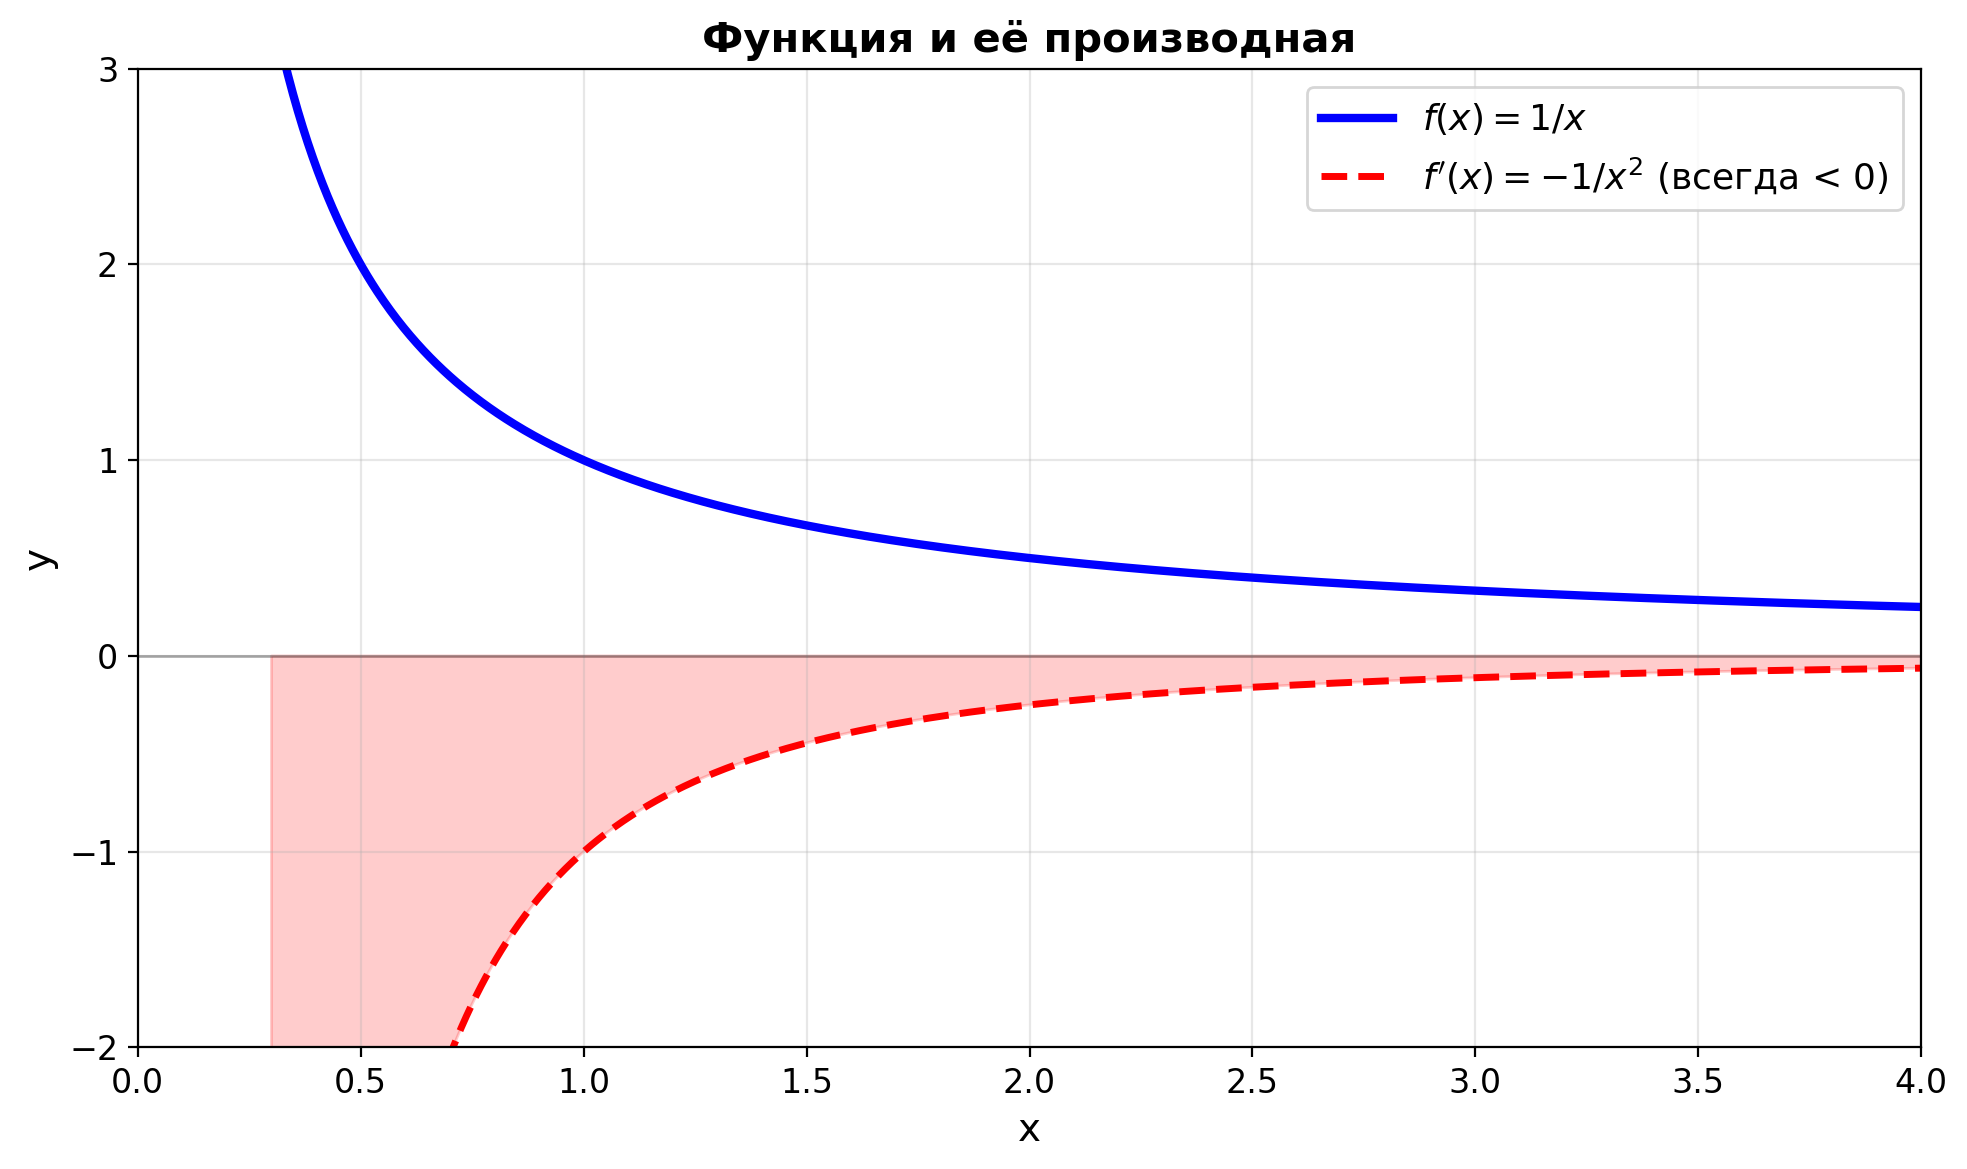

✓ График показывает: производная ВСЕГДА отрицательна!


In [19]:
print("="*80)
print("ПОЧЕМУ ПРОИЗВОДНАЯ ОТРИЦАТЕЛЬНАЯ?")
print("="*80)
print()

print("1. ГЕОМЕТРИЧЕСКИ:")
print("   Функция f(x) = 1/x убывает:")
print("   • Чем больше x, тем меньше 1/x")
print("   • При увеличении x → f(x) уменьшается")
print("   • Значит, Δf < 0 когда Δx > 0")
print("   • Следовательно, f'(x) < 0")
print()

print("2. АЛГЕБРАИЧЕСКИ:")
print("   При вычитании 1/(x+dx) - 1/x:")
print()
print("      1        1      x - (x+dx)")
print("    ───── - ───  =  ─────────────")
print("    x+dx     x       x(x+dx)")
print()
print("   Числитель: x - (x+dx) = -dx < 0  (если dx > 0)")
print("   Знаменатель: x(x+dx) > 0         (если x > 0)")
print()
print("   ⇒ Дробь отрицательна!")
print()

print("="*80)
print()

# Визуализация знака производной
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

x_vals = np.linspace(0.3, 4, 1000)
y_vals = 1 / x_vals
dy_vals = -1 / x_vals**2  # производная

ax.plot(x_vals, y_vals, 'b-', linewidth=3, label=r'$f(x) = 1/x$')
ax.plot(x_vals, dy_vals, 'r--', linewidth=2.5, label=r"$f'(x) = -1/x^2$ (всегда < 0)")
ax.axhline(0, color='black', linewidth=1, linestyle='-', alpha=0.3)
ax.grid(True, alpha=0.3)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Функция и её производная', fontsize=15, fontweight='bold')
ax.legend(fontsize=13, loc='upper right')
ax.set_ylim(-2, 3)
ax.set_xlim(0, 4)

# Заштрихуем область, где производная отрицательна
ax.fill_between(x_vals, 0, dy_vals, where=(dy_vals < 0), 
                color='red', alpha=0.2, label='Производная < 0')

plt.tight_layout()
plt.show()

print("✓ График показывает: производная ВСЕГДА отрицательна!")
print("="*80)


In [20]:
print("="*80)
print("АЛЬТЕРНАТИВНЫЙ СПОСОБ: через правило (x^n)' = n·x^(n-1)")
print("="*80)
print()

print("Перепишем 1/x как степень:")
print()
print("   1/x = x^(-1)")
print()

print("Применим правило производной степенной функции:")
print()
print("   (x^n)' = n·x^(n-1)")
print()

print("Подставим n = -1:")
print()
print("   (x^(-1))' = (-1)·x^(-1-1)")
print()
print("             = -1·x^(-2)")
print()
print("             = -1/x²")
print()

print("="*80)
print("✓ Тот же результат!")
print("="*80)
print()

# Проверка с sympy
x_sym = sp.Symbol('x')
f1 = 1/x_sym
f2 = x_sym**(-1)

print("Проверка:")
print(f"  d(1/x)/dx      = {sp.diff(f1, x_sym)}")
print(f"  d(x^(-1))/dx   = {sp.diff(f2, x_sym)}")
print()
print("✓ Идентичные результаты!")
print("="*80)


АЛЬТЕРНАТИВНЫЙ СПОСОБ: через правило (x^n)' = n·x^(n-1)

Перепишем 1/x как степень:

   1/x = x^(-1)

Применим правило производной степенной функции:

   (x^n)' = n·x^(n-1)

Подставим n = -1:

   (x^(-1))' = (-1)·x^(-1-1)

             = -1·x^(-2)

             = -1/x²

✓ Тот же результат!

Проверка:
  d(1/x)/dx      = -1/x**2
  d(x^(-1))/dx   = -1/x**2

✓ Идентичные результаты!


---

## Численная проверка


In [21]:
print("="*80)
print("ЧИСЛЕННАЯ ПРОВЕРКА")
print("="*80)
print()

print("Проверим для x = 2:")
print()

x_test = 2
analytical_derivative = -1 / x_test**2

print(f"Аналитическая производная: f'({x_test}) = -1/{x_test}² = {analytical_derivative}")
print()

print("Численное приближение через Δf/Δx при Δx → 0:")
print()
print("dx           (f(x+dx) - f(x))/dx       Погрешность")
print("-" * 70)

for dx_val in [0.1, 0.01, 0.001, 0.0001, 0.00001]:
    f_x = 1 / x_test
    f_x_dx = 1 / (x_test + dx_val)
    numerical_derivative = (f_x_dx - f_x) / dx_val
    error = abs(numerical_derivative - analytical_derivative)
    
    print(f"{dx_val:10.5f}   {numerical_derivative:20.10f}   {error:15.10f}")

print()
print("✓ При уменьшении dx численное значение стремится к -0.25")
print("="*80)


ЧИСЛЕННАЯ ПРОВЕРКА

Проверим для x = 2:

Аналитическая производная: f'(2) = -1/2² = -0.25

Численное приближение через Δf/Δx при Δx → 0:

dx           (f(x+dx) - f(x))/dx       Погрешность
----------------------------------------------------------------------
   0.10000          -0.2380952381      0.0119047619
   0.01000          -0.2487562189      0.0012437811
   0.00100          -0.2498750625      0.0001249375
   0.00010          -0.2499875006      0.0000124994
   0.00001          -0.2499987500      0.0000012500

✓ При уменьшении dx численное значение стремится к -0.25


---

## Визуализация касательных


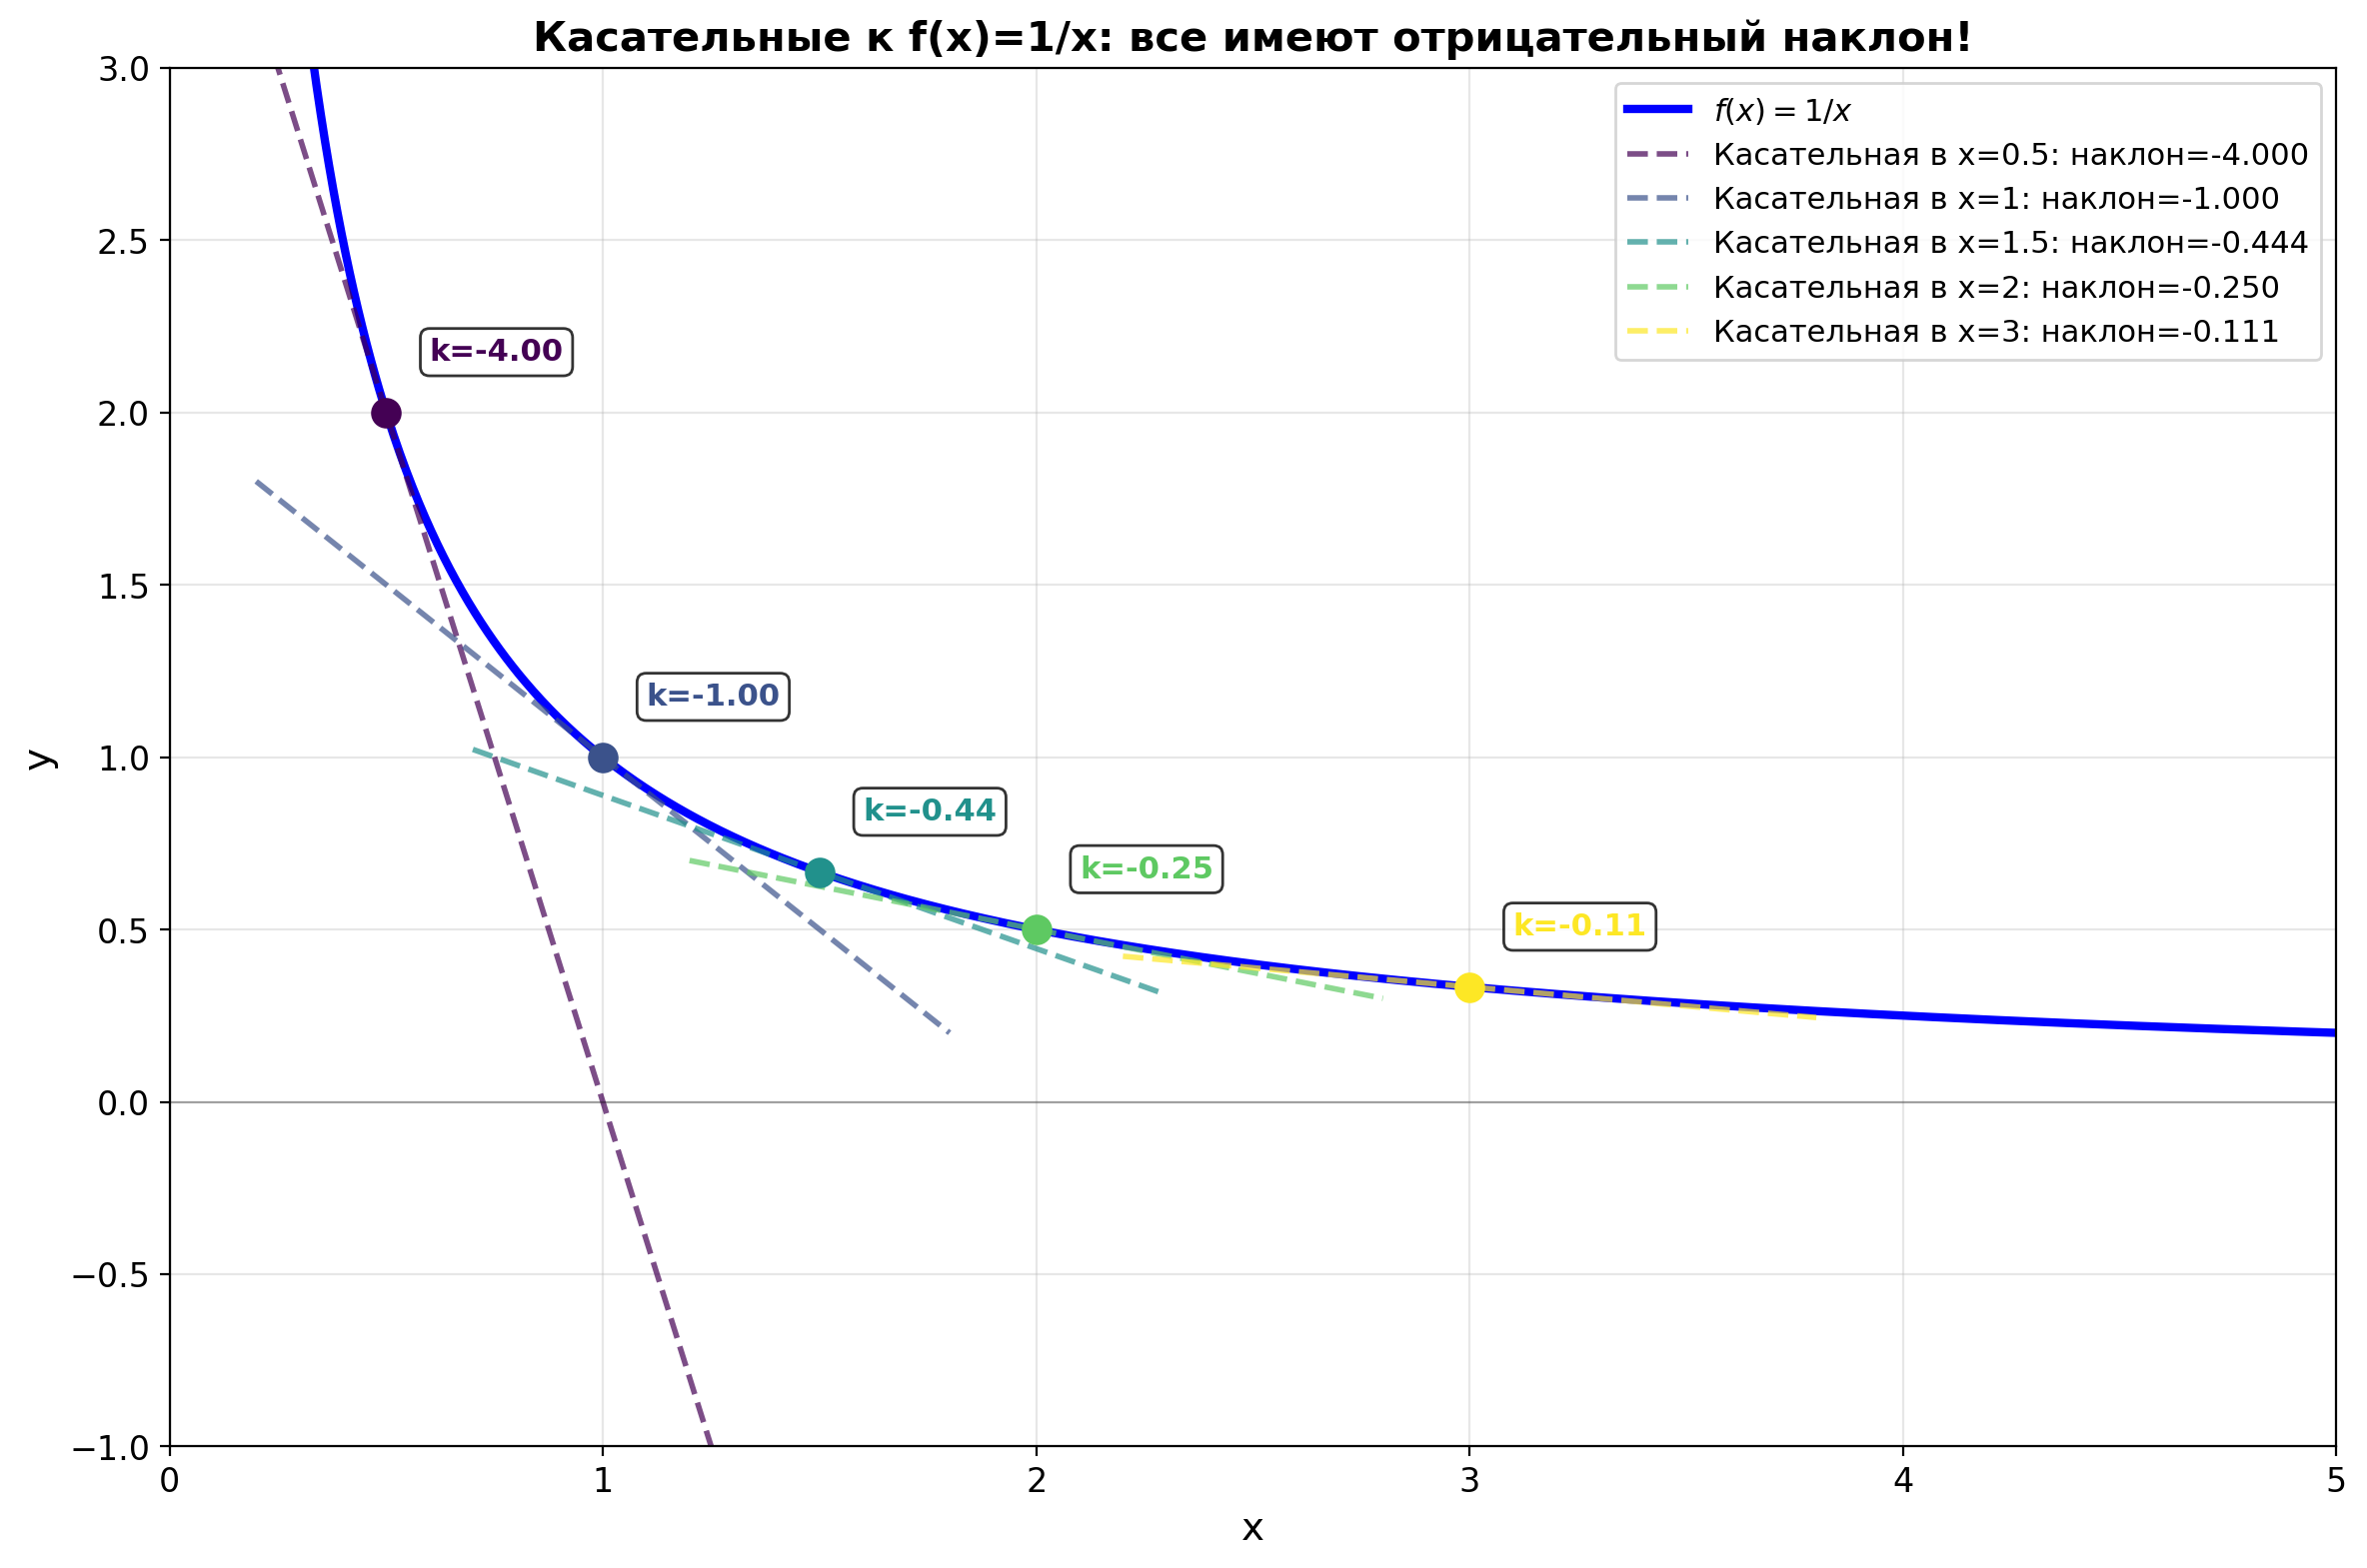

ВАЖНОЕ НАБЛЮДЕНИЕ:

Все касательные имеют ОТРИЦАТЕЛЬНЫЙ наклон!

Это потому что производная f'(x) = -1/x² ВСЕГДА отрицательна
(при x > 0)

Чем больше x, тем меньше |наклон| (по модулю приближается к 0)


In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# График функции
x_range = np.linspace(0.2, 5, 1000)
y_range = 1 / x_range

ax.plot(x_range, y_range, 'b-', linewidth=3, label=r'$f(x) = 1/x$')

# Касательные в нескольких точках
x_points = [0.5, 1, 1.5, 2, 3]
colors = plt.cm.viridis(np.linspace(0, 1, len(x_points)))

for i, x_p in enumerate(x_points):
    y_p = 1 / x_p
    slope = -1 / x_p**2
    
    # Касательная: y - y_p = slope * (x - x_p)
    x_tang = np.linspace(x_p - 0.8, x_p + 0.8, 100)
    y_tang = y_p + slope * (x_tang - x_p)
    
    ax.plot(x_tang, y_tang, '--', color=colors[i], linewidth=2, alpha=0.7,
            label=f'Касательная в x={x_p}: наклон={slope:.3f}')
    ax.plot(x_p, y_p, 'o', color=colors[i], markersize=10, zorder=5)
    
    # Подпись наклона
    ax.text(x_p + 0.1, y_p + 0.15, f"k={slope:.2f}", fontsize=11, 
            color=colors[i], fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax.axhline(0, color='black', linewidth=0.8, linestyle='-', alpha=0.3)
ax.axvline(0, color='black', linewidth=0.8, linestyle='-', alpha=0.3)
ax.grid(True, alpha=0.3)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Касательные к f(x)=1/x: все имеют отрицательный наклон!', 
             fontsize=15, fontweight='bold')
ax.legend(fontsize=11, loc='upper right')
ax.set_ylim(-1, 3)
ax.set_xlim(0, 5)

plt.tight_layout()
plt.show()

print("="*80)
print("ВАЖНОЕ НАБЛЮДЕНИЕ:")
print("="*80)
print()
print("Все касательные имеют ОТРИЦАТЕЛЬНЫЙ наклон!")
print()
print("Это потому что производная f'(x) = -1/x² ВСЕГДА отрицательна")
print("(при x > 0)")
print()
print("Чем больше x, тем меньше |наклон| (по модулю приближается к 0)")
print("="*80)


---

## Резюме

### 🎯 Главные результаты:

**Формула:**
$$\frac{d}{dx}\left(\frac{1}{x}\right) = -\frac{1}{x^2}$$

---

**Алгебраический вывод:**

$$
\begin{align*}
\frac{d(1/x)}{dx} &= \lim_{\Delta x \to 0} \frac{f(x+\Delta x) - f(x)}{\Delta x} \\
&= \lim_{\Delta x \to 0} \frac{\frac{1}{x+\Delta x} - \frac{1}{x}}{\Delta x} \\
&= \lim_{\Delta x \to 0} \frac{x - (x+\Delta x)}{x(x+\Delta x) \cdot \Delta x} \\
&= \lim_{\Delta x \to 0} \frac{-\Delta x}{x(x+\Delta x) \cdot \Delta x} \\
&= \lim_{\Delta x \to 0} \frac{-1}{x(x+\Delta x)} \\
&= \frac{-1}{x \cdot x} = -\frac{1}{x^2}
\end{align*}
$$

---

**Ключевые шаги:**

1. **Вычислить разность:** $\frac{1}{x+dx} - \frac{1}{x}$
2. **Привести к общему знаменателю:** $\frac{x - (x+dx)}{x(x+dx)} = \frac{-dx}{x(x+dx)}$
3. **Разделить на $dx$:** $\frac{-dx}{x(x+dx) \cdot dx} = \frac{-1}{x(x+dx)}$
4. **Предельный переход:** При $dx \to 0$ получаем $-\frac{1}{x^2}$

---

**Почему минус?**

- Функция $f(x) = 1/x$ **убывает** (чем больше $x$, тем меньше $1/x$)
- Убывающая функция → отрицательная производная
- Алгебраически: в числителе появляется $-dx$ при вычитании

---

**Альтернативный способ:**

$$1/x = x^{-1} \quad \Rightarrow \quad (x^{-1})' = -1 \cdot x^{-2} = -\frac{1}{x^2}$$

(используем правило $(x^n)' = nx^{n-1}$ при $n=-1$)
